# Capstone Project - Car Accident Severity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Data Processing

In [3]:
#load in Dataset
accidents = pd.read_csv(r'D:\Eric\Python\IBM Certificate\Capstone\UK road accident\Accidents0515.csv',error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)


In [4]:
vehicles=pd.read_csv(r'D:\Eric\Python\IBM Certificate\Capstone\UK road accident\Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
casualties=pd.read_csv(r'D:\Eric\Python\IBM Certificate\Capstone\UK road accident\Casualties0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 21 columns):
 #   Column                            Dtype
---  ------                            -----
 0   Vehicle_Reference                 int64
 1   Vehicle_Type                      int64
 2   Towing_and_Articulation           int64
 3   Vehicle_Manoeuvre                 int64
 4   Vehicle_Location-Restricted_Lane  int64
 5   Junction_Location                 int64
 6   Skidding_and_Overturning          int64
 7   Hit_Object_in_Carriageway         int64
 8   Vehicle_Leaving_Carriageway       int64
 9   Hit_Object_off_Carriageway        int64
 10  1st_Point_of_Impact               int64
 11  Was_Vehicle_Left_Hand_Drive?      int64
 12  Journey_Purpose_of_Driver         int64
 13  Sex_of_Driver                     int64
 14  Age_of_Driver                     int64
 15  Age_Band_of_Driver                int64
 16  Engine_Capacity_(CC)              int64
 17  Propulsion_Cod

In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780653 entries, 200501BS00001 to 2015984141415
Data columns (total 31 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Location_Easting_OSGR                        float64
 1   Location_Northing_OSGR                       float64
 2   Longitude                                    float64
 3   Latitude                                     float64
 4   Police_Force                                 int64  
 5   Accident_Severity                            int64  
 6   Number_of_Vehicles                           int64  
 7   Number_of_Casualties                         int64  
 8   Date                                         object 
 9   Day_of_Week                                  int64  
 10  Time                                         object 
 11  Local_Authority_(District)                   int64  
 12  Local_Authority_(Highway)                    object 
 13 

In [7]:
# accidents = accidents.join(vehicles, how='outer')

In [8]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [9]:
accidents.isnull().sum()

Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                     0
Junction_Control            

In [10]:
#Drop columns with null and mising values 
accidents.drop(columns=['LSOA_of_Accident_Location', 'Location_Easting_OSGR',
'Location_Northing_OSGR','Junction_Control','2nd_Road_Class'], inplace = True,axis= 1)



In [11]:
accidents.dropna(inplace=True)

In [12]:
accidents.shape

(1780364, 26)

In [13]:
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)


In [14]:
accidents.shape

(1760539, 25)

Text(0, 0.5, 'Accident count')

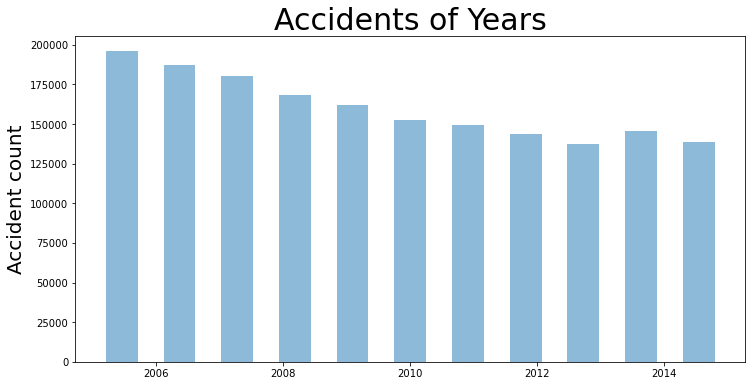

In [21]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.year.hist(bins=11,rwidth=0.5,alpha=0.5)
plt.title('Accidents of Years' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

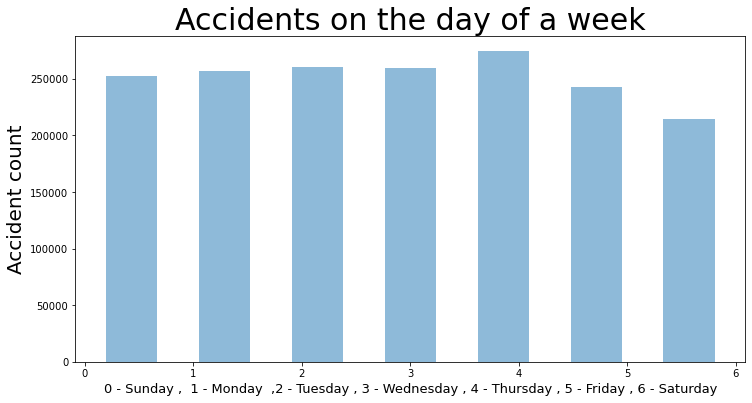

In [13]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.5,alpha=0.5)
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

Text(0, 0.5, 'Accident count')

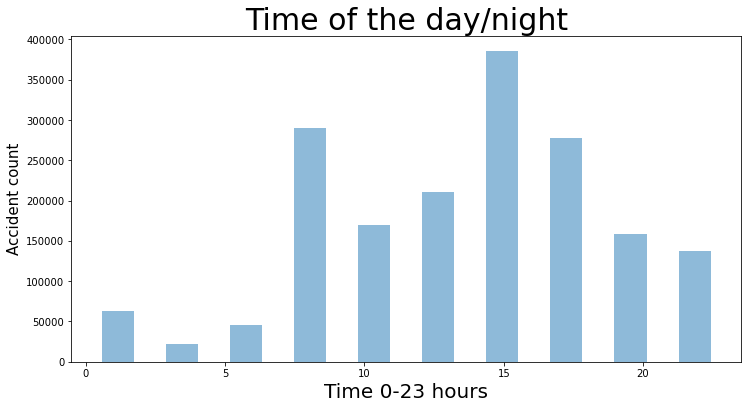

In [22]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.5,alpha =0.50)
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

Text(0.5, 0, 'Age of Drivers')

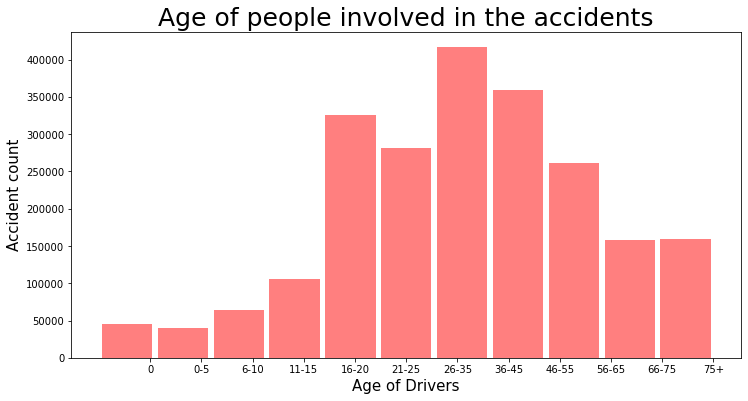

In [28]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']
plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

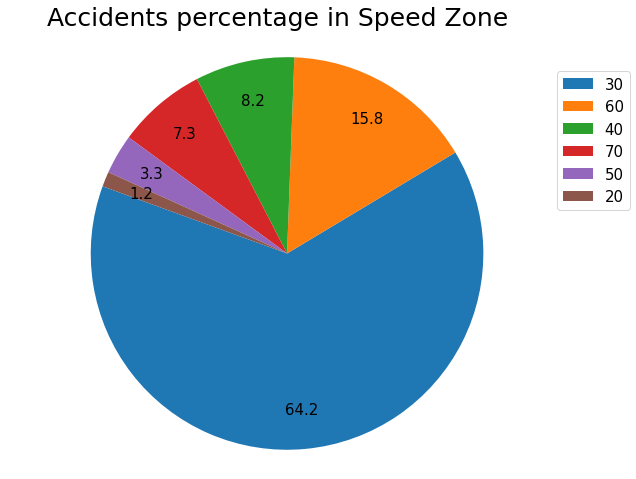

In [29]:
speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

In [60]:
#

(1777621, 23)

In [61]:
#Count the frequency of each Accident_Severity category
acc_sev=df_acc[['Accident_Severity']]
acc_sev=acc_sev.groupby(by=['Accident_Severity'],axis=0).size()
acc_sev=pd.DataFrame(acc_sev)
acc_sev.columns=['Counts']
acc_sev['%']=acc_sev.Counts/acc_sev.Counts.sum()
acc_sev

,Counts,%
Accident_Severity,,
1,22973,0.012923
2,241751,0.135997
3,1512897,0.851080


C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


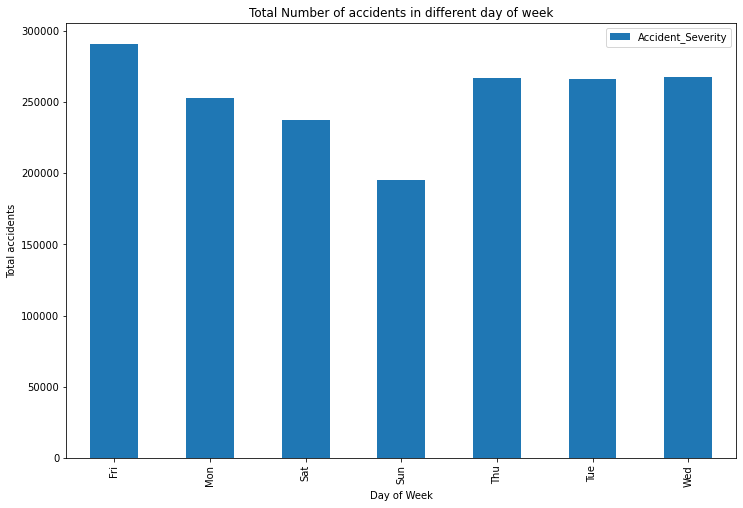

In [63]:
#Relationship between Day_of_Week and Accident_Severity 
dow_sev=df_acc[["Accident_Severity",'Day_of_Week']]
dow_sev['Day_of_Week']=dow_sev['Day_of_Week'].replace([1,2,3,4,5,6,7], ['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
dow_sev_tot=dow_sev.groupby(['Day_of_Week']).count()

dow_sev_tot.plot(kind='bar',
                figsize=(12, 8),
                 )
plt.title('Total Number of accidents in different day of week')
plt.ylabel('Total accidents')
plt.xlabel('Day of Week')
plt.show()

In [30]:
# Create a function to categorize accident severity
def category(accident_severity):
    if accident_severity == 1:
        return 'Fatal'
    elif accident_severity == 2:
        return 'Serious'
    elif accident_severity == 3:
        return 'Slight'
    else:
        return 'Unknown'

In [33]:
# Apply the function and add it as 'Accident_Category' column
accidents['Accident_Category'] = accidents['Accident_Severity'].apply(category)

In [34]:
# Relationship between Light_Conditions and Accident_Severity
# Create a pivot table

lc_sev=accidents[["Accident_Severity",'Light_Conditions','Accident_Category']]

lc_sev_pivot=pd.pivot_table(lc_sev,index=['Light_Conditions'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])

lc_sev_pivot

len                 
                  Accident_Severity                 
Accident_Category             Fatal Serious   Slight
Light_Conditions                                    
1                             13341  164946  1110289
4                              4751   51656   290518
5                               155    1226     6702
6                              4281   19092    74644
7                               239    2436    16263

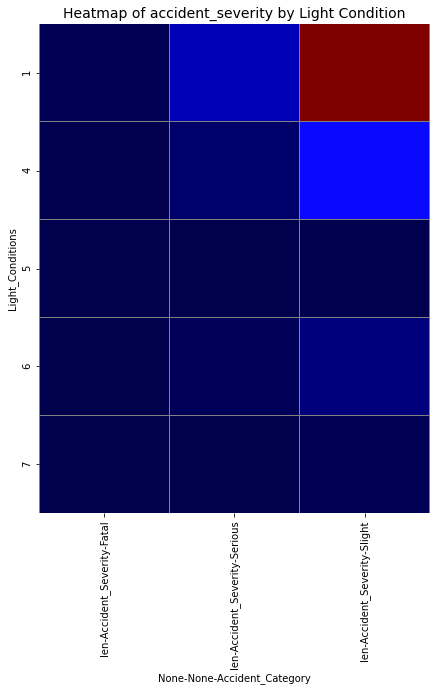

In [35]:
# Using seaborn heatmap
plt.figure(figsize=(7,9))
plt.title('Heatmap of accident_severity by Light Condition', fontsize=14)
sns.heatmap(lc_sev_pivot, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)

In [36]:
# Relationship between Weather_Conditions and Accident_Severity
wt_sev=accidents[["Accident_Severity",'Weather_Conditions','Accident_Category']]
wt_sev_pivot=pd.pivot_table(wt_sev,index=['Weather_Conditions'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])

wt_sev_pivot

len                 
                   Accident_Severity                 
Accident_Category              Fatal Serious   Slight
Weather_Conditions                                   
1                              18840  197079  1192484
2                               2200   25288   181136
3                                 95    1203    10994
4                                426    3454    19171
5                                355    3421    21856
6                                 15     271     2007
7                                207    1374     8019
8                                340    4262    34018
9                                289    3004    28731

In [37]:
# Relationship between Road_Sruface_Conditions and Accident_Severity
rsc_sev=accidents[["Accident_Severity",'Road_Surface_Conditions','Accident_Category']]

rsc_sev_pivot=pd.pivot_table(rsc_sev,index=['Road_Surface_Conditions'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])
rsc_sev_pivot

len                 
                        Accident_Severity                 
Accident_Category                   Fatal Serious   Slight
Road_Surface_Conditions                                   
1                                   15265  168098  1030524
2                                    6992   65619   424327
3                                      82    1137    10166
4                                     374    4151    31229
5                                      54     351     2170

In [40]:
# Relationship between Speed_Limit and Accident_Severity

spl_sev=accidents[["Accident_Severity",'Speed_limit','Accident_Category']]

spl_sev_pivot=pd.pivot_table(spl_sev,index=['Speed_limit'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])
spl_sev_pivot

len                    
                  Accident_Severity                    
Accident_Category             Fatal   Serious    Slight
Speed_limit                                            
0                               NaN       NaN       1.0
10                              3.0       2.0      14.0
15                              NaN       1.0      15.0
20                            118.0    3157.0   18525.0
30                           7529.0  140316.0  981664.0
40                           2125.0   19607.0  122348.0
50                           1249.0    8514.0   47885.0
60                           8739.0   52209.0  217263.0
70                           3004.0   15550.0  110701.0

## Machine Learning

In [15]:
#Join Accidents and Vehicles data
acc_veh = accidents.join(vehicles, how='outer')


In [16]:
#Clean up the data again

acc_veh.dropna(inplace=True)

for col in acc_veh.columns:
    acc_veh = (acc_veh[acc_veh[col]!=-1])
    


In [17]:
acc_veh.shape

(1534792, 46)

In [18]:
acc_veh.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00003,-0.206458,51.525301,1.0,3.0,2.0,1.0,5.0,12.0,E09000020,5.0,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,-0.206458,51.525301,1.0,3.0,2.0,1.0,5.0,12.0,E09000020,5.0,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,-0.173862,51.482442,1.0,3.0,1.0,1.0,6.0,12.0,E09000020,3.0,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0
200501BS00006,-0.203238,51.515540,1.0,3.0,2.0,1.0,3.0,12.0,E09000020,6.0,...,1.0,15.0,1.0,51.0,8.0,2976.0,1.0,1.0,4.0,1.0
200501BS00006,-0.203238,51.515540,1.0,3.0,2.0,1.0,3.0,12.0,E09000020,6.0,...,1.0,15.0,2.0,30.0,6.0,124.0,1.0,2.0,1.0,1.0


In [46]:
df_test=acc_veh[['Weather_Conditions','Road_Surface_Conditions','Light_Conditions', 'Speed_limit','Road_Type','Age_of_Driver','Day_of_Week','Sex_of_Driver',
'Age_of_Vehicle','1st_Point_of_Impact','Vehicle_Type']]
df_test

,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Speed_limit,Road_Type,Age_of_Driver,Day_of_Week,Sex_of_Driver,Age_of_Vehicle,1st_Point_of_Impact,Vehicle_Type
Accident_Index,,,,,,,,,,,
200501BS00003,1.0,1.0,4.0,30.0,6.0,35.0,5.0,1.0,5.0,4.0,11.0
200501BS00003,1.0,1.0,4.0,30.0,6.0,62.0,5.0,1.0,6.0,3.0,9.0
200501BS00004,1.0,1.0,1.0,30.0,6.0,49.0,6.0,2.0,4.0,1.0,9.0
200501BS00006,2.0,2.0,1.0,30.0,6.0,51.0,3.0,1.0,1.0,0.0,9.0
200501BS00006,2.0,2.0,1.0,30.0,6.0,30.0,3.0,2.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2014984136214,1.0,3.0,1.0,70.0,3.0,20.0,2.0,1.0,13.0,4.0,9.0
2014984136414,3.0,3.0,6.0,70.0,3.0,24.0,1.0,1.0,5.0,2.0,9.0
2014984137514,1.0,3.0,6.0,70.0,3.0,55.0,5.0,1.0,9.0,2.0,21.0


In [47]:
T=pd.get_dummies(df_test, columns=['Vehicle_Type'])

In [48]:
#One hot encode column 'Vehicle_Type'
df_test=T
X = np.asarray(df_test)
X[0:5]

array([[ 1.,  1.,  4., 30.,  6., 35.,  5.,  1.,  5.,  4.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  4., 30.,  6., 62.,  5.,  1.,  6.,  3.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1., 30.,  6., 49.,  6.,  2.,  4.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  1., 30.,  6., 51.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  1., 30.,  6., 30.,  3.,  2.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [49]:
y = np.asarray(acc_veh['Accident_Severity'])
y [0:5]

array([3., 3., 3., 3., 3.])

In [50]:
X = preprocessing.StandardScaler().fit(X).transform(X)

X[0:5]

array([[-3.44029619e-01, -5.96887647e-01,  1.30028951e+00,
        -6.89814779e-01,  5.46413067e-01, -2.65113749e-01,
         4.56895020e-01, -7.15300810e-01, -5.03078736e-01,
         1.93887494e+00, -1.21656233e-01, -1.65527853e-01,
        -9.71120076e-02, -1.93941593e-01, -1.41447811e-01,
        -2.00092242e+00, -3.98711540e-02,  6.59073430e+00,
        -2.23167031e-02, -2.18178117e-01, -6.71964921e-02,
        -1.30888818e-01, -1.80493242e-03, -4.39879880e-02,
        -6.99063263e-03, -6.55777546e-03],
       [-3.44029619e-01, -5.96887647e-01,  1.30028951e+00,
        -6.89814779e-01,  5.46413067e-01,  1.42868485e+00,
         4.56895020e-01, -7.15300810e-01, -2.81411966e-01,
         1.05490609e+00, -1.21656233e-01, -1.65527853e-01,
        -9.71120076e-02, -1.93941593e-01, -1.41447811e-01,
         4.99769502e-01, -3.98711540e-02, -1.51728162e-01,
        -2.23167031e-02, -2.18178117e-01, -6.71964921e-02,
        -1.30888818e-01, -1.80493242e-03, -4.39879880e-02,
        -6.99

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=99)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1227833, 26) (1227833,)
Test set: (306959, 26) (306959,)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='lbfgs')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
yhat = LR.predict(X_test)
yhat

array([3., 3., 3., ..., 3., 3., 3.])

In [54]:
from sklearn import metrics
accuracy = metrics.accuracy_score(yhat, y_test)
print(accuracy)

0.8623562104385276


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print (classification_report(y_test, yhat))

C:\Users\owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      4111
         2.0       0.47      0.00      0.00     38151
         3.0       0.86      1.00      0.93    264697

    accuracy                           0.86    306959
   macro avg       0.44      0.33      0.31    306959
weighted avg       0.80      0.86      0.80    306959



In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[3. 3. 3. ... 2. 3. 3.]


In [59]:
print (classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         1.0       0.04      0.05      0.05      4111
         2.0       0.17      0.17      0.17     38151
         3.0       0.87      0.86      0.87    264697

    accuracy                           0.77    306959
   macro avg       0.36      0.36      0.36    306959
weighted avg       0.77      0.77      0.77    306959



In [43]:
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,1.0,2.0,3.0,All
Actual,,,,
1.0,51,369,3691,4111
2.0,198,2523,35430,38151
3.0,781,7150,256766,264697
All,1030,10042,295887,306959


In [45]:
accuracy = metrics.accuracy_score(Y_pred, y_test)
print(accuracy)

0.8448685329311081


C:\Users\owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8623203750337993

In [56]:
print("Accuracy", round(accuracy_score(yhat, y_test)*100,2))

NameError: name 'accuracy_score' is not defined

In [57]:
from sklearn import metrics
accuracy = metrics.accuracy_score(yhat, y_test)
print(accuracy)

0.8623203750337993


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print (classification_report(y_test, yhat))

C:\Users\owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      4111
         2.0       0.00      0.00      0.00     38151
         3.0       0.86      1.00      0.93    264697

    accuracy                           0.86    306959
   macro avg       0.29      0.33      0.31    306959
weighted avg       0.74      0.86      0.80    306959



## Map Visualization

In [101]:
#import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [115]:
#Create a UK map
latitude = 51.5098
longitude = -0.1180
UK_map = folium.Map(location=[latitude, longitude], zoom_start=6)

In [116]:
UK_map

In [120]:
df_acc_sample=df_acc.sample(n=2000) 
# instantiate a feature group for the incidents in the dataframe
accidents = folium.map.FeatureGroup()


for lat, lng, in zip(df_acc_sample.Latitude, df_acc_sample.Longitude):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
UK_map.add_child(accidents)

In [ ]:
UK_map

KeyError: 'Point_of_Impact'